In [2]:
!pip install easyocr
!pip install imutils

In [70]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import imutils
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr

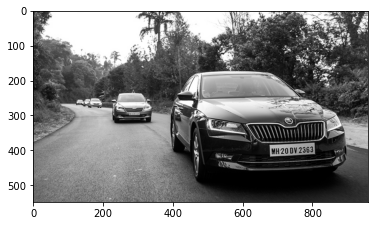

In [115]:
img = cv2.imread(r"C:\Users\kamat\OneDrive\Desktop\license-plates\car1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

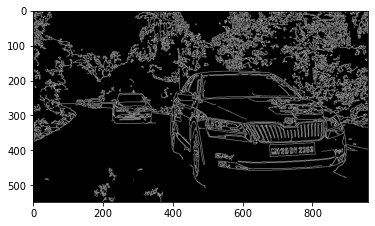

In [116]:

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [117]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [118]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

location

array([[[807, 380]],

       [[678, 384]],

       [[679, 418]],

       [[808, 411]]], dtype=int32)

In [119]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask) 

#produces an overlay and masks everything in black except the number plate

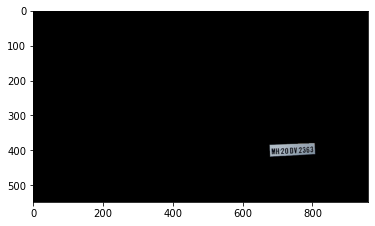

In [120]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [121]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

#first storing set of coordinates which are not black
#then stored the diagonal points of the number plate
#then cropped the image using the rectangular section x1,y1 and x2,y2 cover

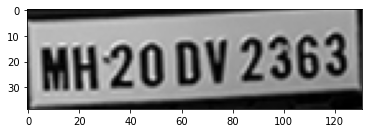

In [122]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

#displaying the cropped image

In [123]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

#Now we read the cropped image using easyocr and set the laguage to english


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 4], [131, 4], [131, 37], [0, 37]], 'MH20 DV 2363', 0.5435011630275409)]

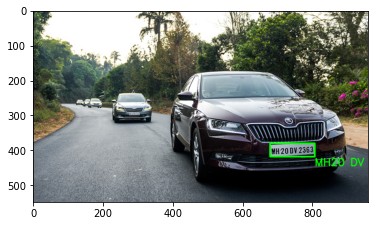

In [124]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))